## DBSCAN Практика

### <b><span style='color:#686dec'>Загружаем данные</span></b>

Используем уже знакомый нам датасет <code>make_blobs</code>

In [2]:
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import seaborn as sns; sns.set(style='white')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы    
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

### <b><span style='color:#686dec'>Обучаем Модель</span></b>

Гиперпараметры модели

- `eps` размер окрестностей 
- `min_samples` минимальное количество точек в кластере

In [3]:
from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=0.5,
#                 min_samples=5)


#### Поробности метода:

- Из набора данных случайным образом выбираем точку и смотрим её окрестности
- Если там не менее X количество точек `min_samples`, то мы помечаем скопление кластером и далее для каждой точки из окрестности рассматриваем такое же окружение
- Повторяем до момента окончания точек в наборе



- В отличие от `K-means` и `AgglomerativeClustering`, класс `DBSCAN` не имеет параметра `n_clusters`
- Поскольку DBSCAN автоматически определяет число кластеров в выборке

Обучение модели `DBSCAN` проходит аналогично обучению модели K-means:

```python
dbscan.fit(X)
```

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

```python
dbscan.labels_
```
    

### <b><span style='color:#686dec'>Применение Модели</span></b>

Рассмотрим 6 разных типов данных, и как `DBSCAN` справляется с ними

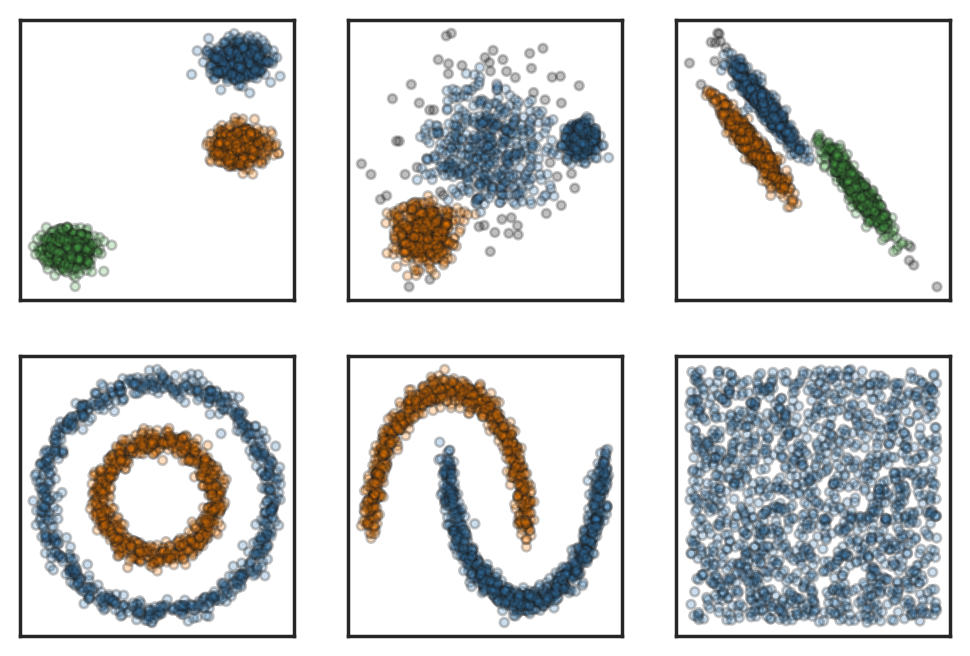

In [4]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

plt.rcParams['figure.figsize'] = 6, 4
for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    
    X = StandardScaler().fit_transform(X)
    
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], s=10,ec='k',alpha=0.25,color=colors[y_pred])

- В результате при хорошо разделимых кластерах `DBSCAN` справляется отлично, он определил сложные случаи и ленточную структуру, правда, нашёл лишние выбросы
- Это единственный алгорит, по сравнению с предыдущими, который определил, что кластерной структуры в посленем датасете нет
- Добавление шума смущает алгоритм: в одном из примеров кластеры склеились между собой

In [21]:
# Визуализируем исходные данные
def plot_scatter():
    plt.rcParams['figure.figsize'] = 3, 3
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=10,ec='k',alpha=0.25,color=colors[y_pred])

### <b><span style='color:#686dec'>Задание</span></b>

#### <b>Задание <span style='color:#F1A424'>4.8.1</span></b> 

Какой параметр `DBSCAN` устанавливает число объектов в окрестности, которое определяет, является ли объект основным или нет?

In [5]:
dbscan = DBSCAN(min_samples=3)

#### <b>Задание <span style='color:#F1A424'>4.8.2</span></b> 

- Обучите модель `DBSCAN` с параметрами `eps=0.9` и `min_samples=35` на признаках объектов исходного датасета
- Выведите число получившихся кластеров
- Обратите внимание, что `DBSCAN` определяет выбросы, относя их к `кластеру -1`
- Кластер выбросов учитывать в ответе не нужно

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib as mpl

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

dbscan = DBSCAN(eps=0.9,min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

In [22]:
plot_scatter()

#### <b>Задание <span style='color:#F1A424'>4.8.3</span></b> 

Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

In [23]:
from collections import Counter

Counter(y_pred)

Counter({0: 603, 1: 681, -1: 583, 2: 1133})

In [16]:
Counter(y_pred)[-1]

368

#### <b>Задание <span style='color:#F1A424'>4.8.4</span></b> 

- Проверьте, как настройка параметров влияет на результат работы `DBSCAN`
- Обучите модель `DBSCAN` с параметрами `eps=0.8` и `min_samples=35` на признаках объектов исходного датасета
- Не применяйте трансформацию к признакам. Выведите число объектов выборки, которые были отмечены как выбросы.

In [24]:
dbscan = DBSCAN(eps=0.8,min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
Counter(y_pred)

Counter({0: 603, 1: 681, -1: 583, 2: 1133})

In [25]:
Counter(y_pred)[-1]

583

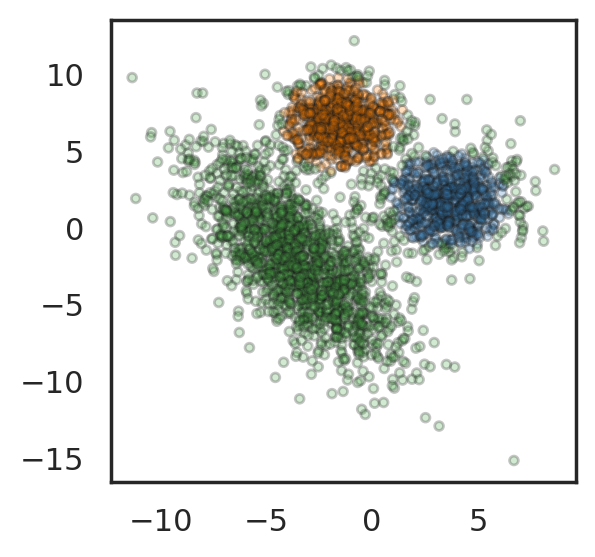

In [26]:
plot_scatter()